In [42]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use("seaborn-v0_8")

In [43]:
stocks = ['AAPL','MSFT','GOOGL']
market_index = '^GSPC'
start_date = '2020-01-01'
end_date = '2025-01-01'

In [44]:
stock_prices=yf.download(stocks,start=start_date,end=end_date)['Close']
market_prices=yf.download(market_index,start=start_date,end=end_date)['Close']

/var/folders/r8/d7pg_4jd5s90jx1k1j_gxh0c0000gn/T/ipykernel_28101/3497743121.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_prices=yf.download(stocks,start=start_date,end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed
/var/folders/r8/d7pg_4jd5s90jx1k1j_gxh0c0000gn/T/ipykernel_28101/3497743121.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_prices=yf.download(market_index,start=start_date,end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_prices.head()



(Ticker           AAPL      GOOGL        MSFT
 Date                                        
 2020-01-02  72.468262  67.920799  152.505692
 2020-01-03  71.763725  67.565483  150.606750
 2020-01-06  72.335556  69.366386  150.996033
 2020-01-07  71.995361  69.232399  149.619232
 2020-01-08  73.153503  69.725174  152.002487,)

In [46]:
stock_prices.dropna(inplace=True)
market_prices.dropna(inplace=True)

In [47]:
stock_returns=stock_prices.pct_change()
market_returns=market_prices.pct_change()

In [48]:
volatility=stock_returns.std() * np.sqrt(252)
volatility_df=pd.DataFrame(volatility,columns=['Annulized Volatility'])


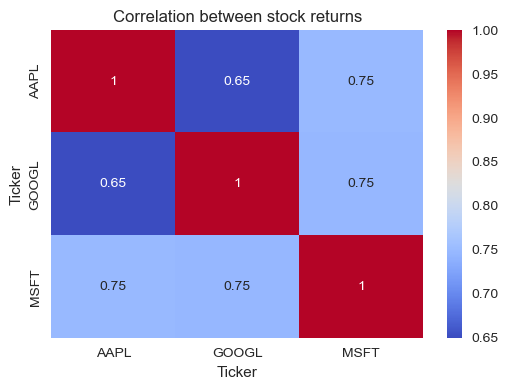

In [49]:
correlation_matrix=stock_returns.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between stock returns')
plt.show()

betas={}
for stock in stocks:
    X=sm.add_constant(market_returns)
    Y=stock_returns[stock]
    model=sm.OLS(Y,X).fit()
    betas[stock]=model.params[1]

beta_df=pd.DataFrame.from_dict(betas,orient='index',columns=['Beta'])

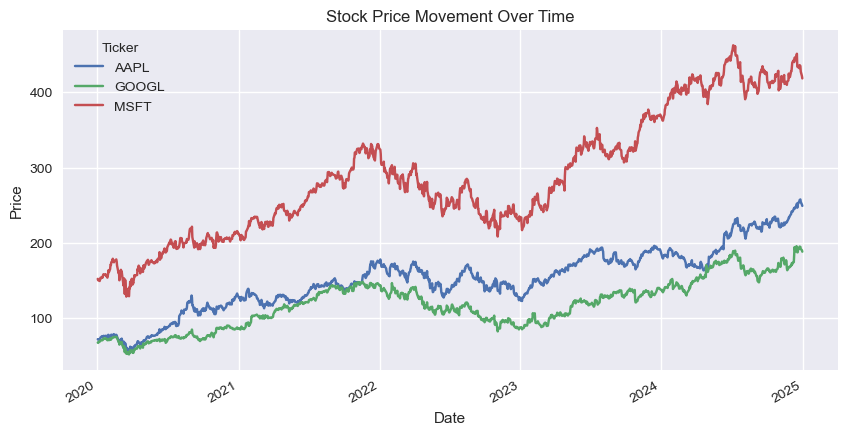

In [50]:
stock_prices.plot(figsize=(10,5))
plt.title("Stock Price Movement Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

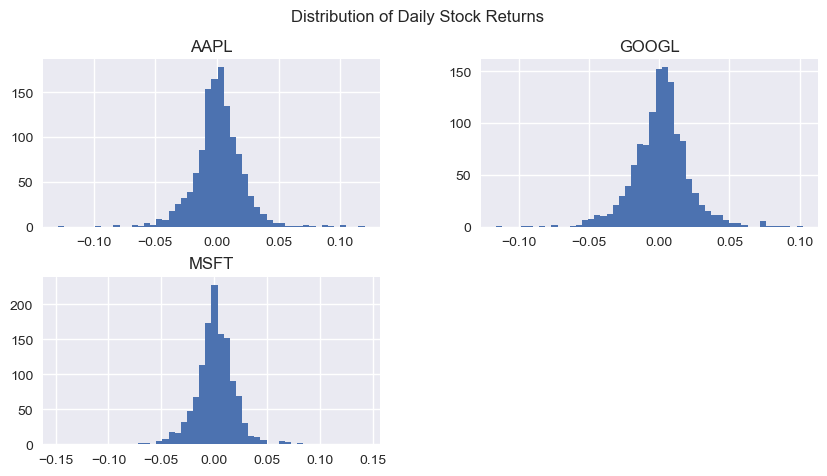

In [51]:
stock_returns.hist(bins=50, figsize=(10, 5))
plt.suptitle("Distribution of Daily Stock Returns")
plt.show()


Key Observations

- Volatility highlights the risk differences between stocks.
- Correlation analysis shows diversification benefits.
- Beta measures sensitivity of each stock to market movements.

This analysis helps in portfolio construction and risk management.


Conclusion

This project demonstrates how Python can be used to analyze financial risk
metrics using real market data. The techniques applied here are widely used
in quantitative finance and portfolio management.